# Who are the highest scorers and most efficient scorers in the league?

### Methodology

1. Create a dataframe for both parts of the question
2. Visualize the dataframes in a scatterplot

## Import Libraries and Data

In [3]:
# Importing the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data
df1 = pd.read_excel('nba_player_data.xlsx')
df2 = pd.read_csv('PlayerIndex_nba_stats.csv')

# Merging the DataFrames
df2 = df2.rename(columns={'PERSON_ID': 'PLAYER_ID'})
df = pd.merge(df1, df2, on='PLAYER_ID', how='left')

# Data Cleaning
df.drop(columns=['RANK'], inplace=True)
df['season_start_year'] = df['Year'].str[:4].astype(int)
df['TEAM'] = df['TEAM'].replace(to_replace=['NOP','NOH'], value='NO')
df['Season_type'] = df['Season_type'].replace('Regular%20Season','Regular Season')

# Create Per Game Average Columns
df['PPG'] = df['PTS_x'] / df['GP']
df['RPG'] = df['REB_x'] / df['GP']
df['APG'] = df['AST_x'] / df['GP']
df['SPG'] = df['STL'] / df['GP'] 
df['BPG'] = df['BLK'] / df['GP']

## Filter Data for Question

In [4]:
# Filter for only regular season data
df_rs = df[df['Season_type'] == 'Regular Season']

# Filter for players with at least 10 PPG
df_rs_10 = df_rs[df_rs['PPG'] >= 10].copy()

## Create Dataframes for Visualizations

Create a variable for the number of players included in the visualtizations and create the dataframes for top scorers and most efficient scorers

In [5]:
# Set value for number of top scorers to display in visualization
top_scorers = 15

# Create dataframe for the top scorers based on PPG and FG%
df_ppg = df_rs_10[['PLAYER', 'Year', 'PPG', 'FG_PCT', 'Year']].sort_values(by='PPG', ascending=False).head(top_scorers)

# Create dataframe for the most efficient scorers among players with at least 10 PPG
df_eff = df_rs_10[['PLAYER', 'Year', 'PPG', 'FG_PCT', 'Year']].sort_values(by='FG_PCT', ascending=False).head(top_scorers)

## Plot the Top Scorers

Use `Seaborn` to create a scatterplot comparing PPG and FG% for the top scorers in the league. Create a for loop to name each dot on the plot. Use `adjustText` to avoid overlapping names.

C:\Users\micha\AppData\Local\Temp\ipykernel_9280\2037088335.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


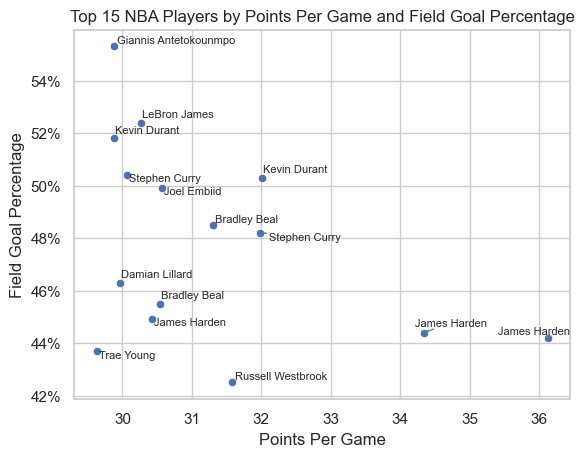

In [6]:
from adjustText import adjust_text

sns.set_theme(style='whitegrid')

sns.scatterplot(data = df_ppg, x='PPG', y='FG_PCT')

plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

plt.title(f'Top {top_scorers} NBA Players by Points Per Game and Field Goal Percentage')
plt.xlabel('Points Per Game')
plt.ylabel('Field Goal Percentage')

texts = []
for i, txt in enumerate(df_ppg.index):
    texts.append(plt.text(df_ppg['PPG'].iloc[i], df_ppg['FG_PCT'].iloc[i], df_ppg['PLAYER'].iloc[i], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

## Plot the Most Efficient Scorers

Use `Seaborn` to create a scatterplot comparing PPG and FG% for the most efficient scorers in the league. Create a for loop to name each dot on the plot. Use `adjustText` to avoid overlapping names.

C:\Users\micha\AppData\Local\Temp\ipykernel_9280\283948900.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


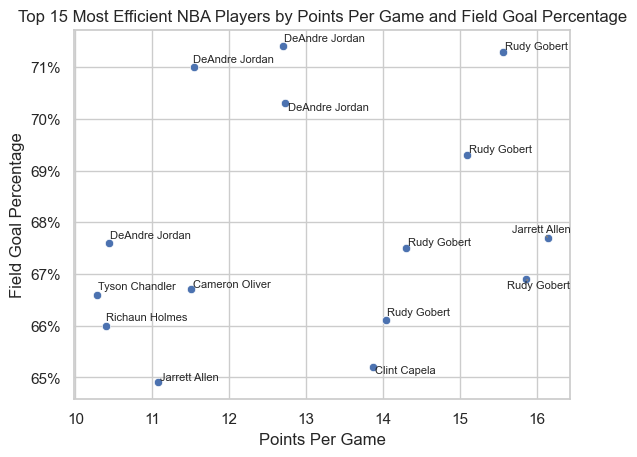

In [7]:
from adjustText import adjust_text

sns.set_theme(style='whitegrid')

sns.scatterplot(data = df_eff, x='PPG', y='FG_PCT')

plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

plt.title(f'Top {top_scorers} Most Efficient NBA Players by Points Per Game and Field Goal Percentage')
plt.xlabel('Points Per Game')
plt.ylabel('Field Goal Percentage')

texts = []
for i, txt in enumerate(df_ppg.index):
    texts.append(plt.text(df_eff['PPG'].iloc[i], df_eff['FG_PCT'].iloc[i], df_eff['PLAYER'].iloc[i], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()